In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [71]:
resultsdf = pd.read_csv('./dataset/results.csv', parse_dates=['date'])

print(resultsdf.info())

resultsdf['year'] = resultsdf['date'].dt.year

display(resultsdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        45315 non-null  datetime64[ns]
 1   home_team   45315 non-null  object        
 2   away_team   45315 non-null  object        
 3   home_score  45315 non-null  int64         
 4   away_score  45315 non-null  int64         
 5   tournament  45315 non-null  object        
 6   city        45315 non-null  object        
 7   country     45315 non-null  object        
 8   neutral     45315 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.8+ MB
None


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


## Get Tournament Data & Focus on World Cup

<Axes: xlabel='tournament'>

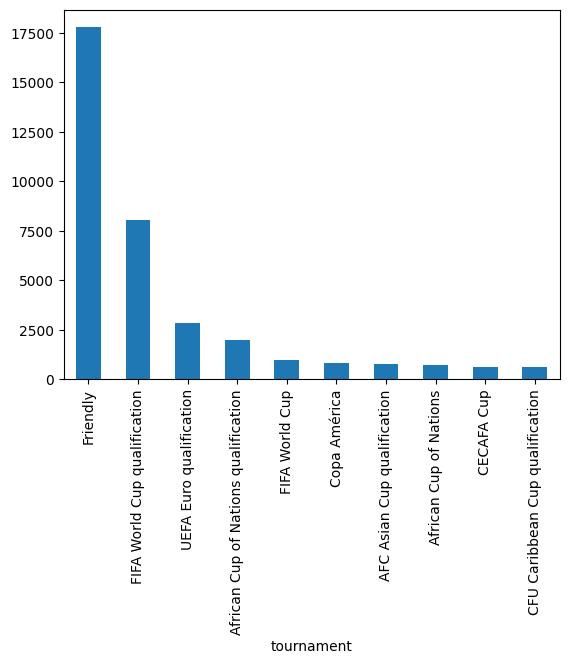

In [72]:
tournament_count = resultsdf.groupby('tournament')['date'].count().sort_values(ascending=False)
tournament_count.head(10).plot(kind='bar')

## How Many Matches in Every World Cup?

In [73]:
worldcup_results = resultsdf[resultsdf['tournament'] == 'FIFA World Cup']
worldcup_matchcount = worldcup_results.groupby('year')['date'].count().sort_index(ascending=False)

In [74]:
px.bar(worldcup_matchcount, x=worldcup_matchcount.index, y=worldcup_matchcount.values, labels={'x':'Match Year', 'y':'Match Count'}, title='FIFA World Cup Match Count by Year')

## Which Matches Had The Highest Goal Difference?

In [75]:
worldcup_results['goal_difference'] = abs(worldcup_results['home_score']-worldcup_results['away_score'])

highest_goaldifference = worldcup_results[worldcup_results['goal_difference'] == worldcup_results['goal_difference'].max()]
highest_goaldifference

C:\Users\Windows\AppData\Local\Temp\ipykernel_20528\1831044108.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,goal_difference
3667,1954-06-17,Hungary,South Korea,9,0,FIFA World Cup,Zürich,Switzerland,True,1954,9
9208,1974-06-18,Yugoslavia,DR Congo,9,0,FIFA World Cup,Gelsenkirchen,Germany,True,1974,9
12559,1982-06-15,Hungary,El Salvador,10,1,FIFA World Cup,Elche,Spain,True,1982,9


## Which Matches Had The Highest Number of Goals?

In [76]:
worldcup_results['total_goals'] = worldcup_results['home_score'] + worldcup_results['away_score']

highest_scoring_match = worldcup_results[worldcup_results['total_goals']==worldcup_results['total_goals'].max()]
highest_scoring_match

C:\Users\Windows\AppData\Local\Temp\ipykernel_20528\2253151629.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,goal_difference,total_goals
3680,1954-06-26,Switzerland,Austria,5,7,FIFA World Cup,Lausanne,Switzerland,False,1954,2,12


## Which Country Scored The Most Goals?

In [77]:
score_by_country = worldcup_results.groupby('home_team').agg({'home_score':'sum', 'away_score':'sum'}).reset_index().rename(columns={'home_team':'country', 'home_score':'home_goals', 'away_score':'away_goals'})
score_by_country['total_goals'] = score_by_country['home_goals']+score_by_country['away_goals']
score_by_country.sort_values('total_goals', ascending=False).reset_index(drop=True)

,country,home_goals,away_goals,total_goals
0,Brazil,184,84,268
1,Germany,159,79,238
2,Argentina,125,67,192
3,France,96,48,144
4,Italy,72,37,109
...,...,...,...,...
75,New Zealand,1,1,2
76,Ukraine,1,0,1
77,Norway,1,0,1
78,Angola,0,1,1


## Map Based on Goals

In [78]:
fig = px.choropleth(score_by_country, locations='country', locationmode='country names', color='total_goals', hover_name='country', projection='natural earth')
fig.show()